# Neural net painter

This notebook demonstrates a fun experiment in training a neural network to do regression from the color (r,g,b) of a pixel in an image, given its (x,y) position in the image. It's mostly useless, but gives a nice visual intuition for regression. This notebook is inspired by the same example in [convnet.js](https://cs.stanford.edu/people/karpathy/convnetjs/demo/image_regression.html) and the first part of this notebook is mostly reimplementing it in Keras instead. Later, we'll have some fun interpolating different image models.

First make sure the following import statements work.

In [1]:
%matplotlib inline
import time
from PIL import Image
import numpy as np
import keras
from matplotlib.pyplot import imshow, figure
from keras.models import Sequential
from keras.layers import Dense

Using Theano backend.


First we'll open an image, and create a helper function that converts that image into a training set of `(x,y)` positions (the data) and their corresponding `(r,g,b)` colors (the labels). We'll then load a picture with it.

('data', array([[ 0.        ,  0.        ],
       [ 0.00333333,  0.        ],
       [ 0.00666667,  0.        ],
       ..., 
       [ 0.99      ,  0.99666667],
       [ 0.99333333,  0.99666667],
       [ 0.99666667,  0.99666667]]))
('labels', array([[ 81,  93,  55],
       [ 83,  95,  57],
       [ 83,  95,  57],
       ..., 
       [103, 110,  56],
       [102, 111,  56],
       [105, 114,  57]]))


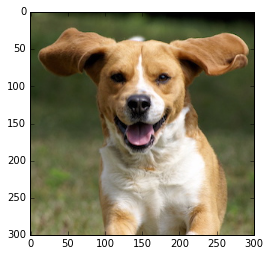

In [106]:
def get_data(img):
    width, height = img.size
    pixels = img.getdata()
    x_data, y_data = [],[]
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = pixels[idx]
            x_data.append([x / float(width), y / float(height)])
            y_data.append([r, g, b])
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    return x_data, y_data

im1 = Image.open("../assets/dog.jpg")
x1, y1 = get_data(im1)

print("data", x1)
print("labels", y1)
imshow(im1)

We've postfixed all the variable names with a `1` because later we'll open a second image.

We're now going to define a neural network which takes a 2-neuron input (the normalized x, y position) and outputs a 3-neuron output corresponding to color. We'll use Keras's `Sequential` class to create a deep neural network with a bunch of 20-neuron fully-connected layers with ReLU activations. Our loss function will be a mean_squared_error between the predicted colors and the actual ones from the image.

Once we've defined that model, we'll create a neural network `m1` with that architecture.

In [107]:
def make_model():
    model = Sequential()
    model.add(Dense(2, activation='relu', input_shape=(2,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(3))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

m1 = make_model()

Let's now go ahead and train our neural network. In this case, we are going to use the training set as the validation set as well. Normally, you'd never do this because it would cause your neural network to overfit. But in this experiment, we're not worried about overfitting... in fact, overfitting is the whole point! 

We train for 25 epochs and have a batch size of 5.

In [110]:
m1.fit(x1, y1, batch_size=5, epochs=25, verbose=1, validation_data=(x1, y1))

Train on 90000 samples, validate on 90000 samples
Epoch 1/25
90000/90000 [==============================] - 14s - loss: 2002.3063 - val_loss: 1171.1338
Epoch 2/25
90000/90000 [==============================] - 14s - loss: 1086.8314 - val_loss: 918.1843
Epoch 3/25
90000/90000 [==============================] - 14s - loss: 957.3645 - val_loss: 918.2111
Epoch 4/25
90000/90000 [==============================] - 14s - loss: 857.1589 - val_loss: 720.3658
Epoch 5/25
90000/90000 [==============================] - 14s - loss: 805.0964 - val_loss: 750.3459
Epoch 6/25
90000/90000 [==============================] - 14s - loss: 765.9619 - val_loss: 771.9224
Epoch 7/25
90000/90000 [==============================] - 15s - loss: 734.4772 - val_loss: 657.6535
Epoch 8/25
90000/90000 [==============================] - 15s - loss: 696.4479 - val_loss: 709.5435
Epoch 9/25
90000/90000 [==============================] - 15s - loss: 661.7919 - val_loss: 607.3664
Epoch 10/25
90000/90000 [======================

Now that the neural net is finished training, let's take the training data, our pixel positions, and simply send them back straight through the network, and plot the predicted colors on a new image. We'll make a new function for this called `generate_image`. 

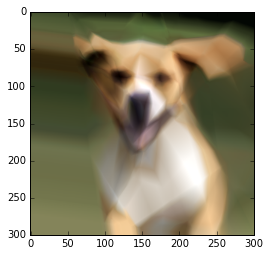

In [115]:
def generate_image(model, x, width, height):
    img = Image.new("RGB", [width, height])
    pixels = img.load()
    y_pred = model.predict(x)
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = y_pred[idx]
            pixels[x, y] = (int(r), int(g), int(b))
    return img

img = generate_image(m1, x1, im1.width, im1.height)
imshow(img)

Sort of looks like the original image a bit! Of course the network can't learn the mapping perfectly without pretty much memorizing the data, but this way gives us a pretty good impression and doubles as an extremely inefficient form of compression!

Let's load another image. We'll load the second image and also resize it so that it's the same size as the first image.

('data', array([[ 0.        ,  0.        ],
       [ 0.00333333,  0.        ],
       [ 0.00666667,  0.        ],
       ..., 
       [ 0.99      ,  0.99666667],
       [ 0.99333333,  0.99666667],
       [ 0.99666667,  0.99666667]]))
('labels', array([[ 37,  68,  36],
       [ 37,  68,  36],
       [ 37,  68,  36],
       ..., 
       [140, 129, 111],
       [169, 157, 141],
       [188, 176, 162]]))


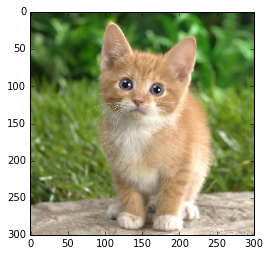

In [113]:
im2 = Image.open("../assets/kitty.jpg")
im2 = im2.resize(im1.size)
x2, y2 = get_data(im2)

print("data", x2)
print("labels", y2)
imshow(im2)

Now we'll repeat the experiment from before. We'll make a new neural network `m2` which will learn to map `im2`'s (x,y) positions to its (r,g,b) colors.

In [153]:
m2 = make_model()   # make a new model, keep m1 separate
m2.fit(x2, y2, batch_size=5, epochs=25, verbose=1, validation_data=(x2, y2))

Train on 90000 samples, validate on 90000 samples
Epoch 1/25
90000/90000 [==============================] - 14s - loss: 1800.5274 - val_loss: 1437.2682
Epoch 2/25
90000/90000 [==============================] - 14s - loss: 1212.6455 - val_loss: 1096.8885
Epoch 3/25
90000/90000 [==============================] - 14s - loss: 1094.5103 - val_loss: 1005.1028
Epoch 4/25
90000/90000 [==============================] - 15s - loss: 1009.9215 - val_loss: 948.4184
Epoch 5/25
90000/90000 [==============================] - 14s - loss: 938.0951 - val_loss: 850.9224
Epoch 6/25
90000/90000 [==============================] - 15s - loss: 887.9691 - val_loss: 888.7474
Epoch 7/25
90000/90000 [==============================] - 14s - loss: 835.1295 - val_loss: 736.5175
Epoch 8/25
90000/90000 [==============================] - 14s - loss: 783.4720 - val_loss: 743.1138
Epoch 9/25
90000/90000 [==============================] - 14s - loss: 747.9630 - val_loss: 719.7908
Epoch 10/25
90000/90000 [==================

Let's generate a new image from `m2` and see how it looks.

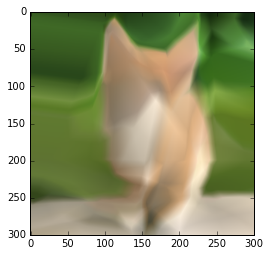

In [154]:
img = generate_image(m2, x2, im2.width, im2.height)
imshow(img)

Not too bad!

Now let's do something funky. We're going to make a new neural network, `m3`, with the same architecture as `m1` and `m2` but instead of training it, we'll just set its weights to be interpolations between the weights of `m1` and `m2` and at each step, we'll generate a new image. In other words, we'll gradually change the model learned from the first image into the model learned from the second image, and see what kind of an image it outputs at each step.

To help us do this, we'll create a function `get_interpolated_weights` and we'll make one change to our image generation function: instead of just coloring the pixels to be the exact outputs, we'll auto-normalize every frame by rescaling the minimum and maximum output color to 0 to 255. This is because sometimes the intermediate models output in different ranges than what `m1` and `m2` were trained to. Yeah, this is a bit of a hack, but it works!

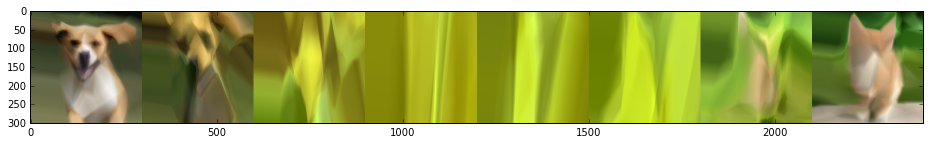

In [155]:
def get_interpolated_weights(model1, model2, amt):
    w1 = np.array(model1.get_weights())
    w2 = np.array(model2.get_weights())
    w3 = np.add((1.0 - amt) * w1, amt * w2)
    return w3

def generate_image_rescaled(model, x, width, height):
    img = Image.new("RGB", [width, height])
    pixels = img.load()
    y_pred = model.predict(x)
    y_pred = 255.0 * (y_pred - np.min(y_pred)) / (np.max(y_pred) - np.min(y_pred))  # rescale y_pred
    for y in range(height):
        for x in range(width):
            idx = x + y * width
            r, g, b = y_pred[idx]
            pixels[x, y] = (int(r), int(g), int(b))
    return img


# make new model to hold interpolated weights
m3 = make_model()

# we'll do 8 frames and stitch the images together at the end
n = 8
interpolated_images = []
for i in range(n):
    amt = float(i)/(n-1.0)
    w3 = get_interpolated_weights(m1, m2, amt)
    m3.set_weights(w3)
    img = generate_image_rescaled(m3, x1, im1.width, im1.height)
    interpolated_images.append(img)

full_image = np.concatenate(interpolated_images, axis=1)
figure(figsize=(16,4))
imshow(full_image)

Neat... Let's do one last thing, and make an animation with more frames. We'll generate 120 frames inside the assets folder, then use `ffmpeg` to stitch them into an mp4 file. If you don't have ffmpeg, you can install it from [here](https://ffmpeg.org/).

In [160]:
n = 120
frames_dir = '../assets/neural-painter-frames'
video_path = '../assets/neural-painter-interpolation.mp4'

import os
if not os.path.isdir(frames_dir):
    os.makedirs(frames_dir)

for i in range(n):
    amt = float(i)/(n-1.0)
    w3 = get_interpolated_weights(m1, m2, amt)
    m3.set_weights(w3)
    img = generate_image_rescaled(m3, x1, im1.width, im1.height)
    img.save('../assets/neural-painter-frames/frame%04d.png'%i)

cmd = 'ffmpeg -i %s/frame%%04d.png -c:v libx264 -pix_fmt yuv420p %s' % (frames_dir, video_path)
os.system(cmd)

0

You can find the video now in the assets directory. Looks neat! We can also display it in this notebook. From here, there's a lot of fun things we can do... Triangulating between multiple images, or streaming together several interpolations, or predicting color from not just position, but time in a movie. Lots of possibilities. 

![dogcat](../assets/dog-cat-interp.gif)

In [162]:
from IPython.display import HTML
import io
import base64

video = io.open(video_path, 'r+b').read()
encoded = base64.b64encode(video)

HTML(data='''<video alt="test" controls>
     <source src="data:video/mp4;base64,{0}" type="video/mp4" />
     </video>'''.format(encoded.decode('ascii')))